Theresa Pareno

# Understand Customer Purchase Behaviour 

In [5]:
# for data
import numpy as np # perform math operations (matrix math)
import pandas as pd 
from pandas import Series, DataFrame

# for plotting
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

#for the image
from IPython.display import Image

#statistics
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings("ignore")

Assumptions 
1. Gender: Females tends to buy more than males.
2. Ages: Young people will tend to buy cheaper things and older people might tend to buy expensive things.
3. Occupation: The higher income occupation will spend more on expensive products.
4. number of city years: Newly transfered people tends to buy more compared to the people who stayed longer in the place.
5. City category: if the city has more number of purchases then we assume that it is a more developed city. 



# Data Exploration
1. Access the Data 
2. Get Information about the variables
3. Showing what type of variable we have
4. Univariate analysis
    - Continuous variable
    - Categorical variable
5. Bi-variate analysis 
    - Use of anova (target ~ Features)
    - continuous vs. categorical 
    - categorical vs categorical 

In [6]:
#access the data
df = pd.read_csv('PurchaseBehaviour.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [7]:
df.shape

(550068, 12)

In [8]:
#getting the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
# show what type of variables we have
Image(filename='data.png',width=750, height=750)

FileNotFoundError: [Errno 2] No such file or directory: 'data.png'

# Univariate analysis

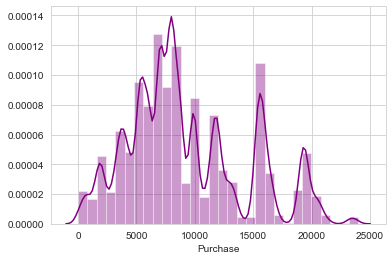

In [11]:
#continues data
sns.distplot(df['Purchase'],bins=30,color='purple')

Observation: The target variable consists of 3 modes from the different ranges of prices. 

M    414259
F    135809
Name: Gender, dtype: int64


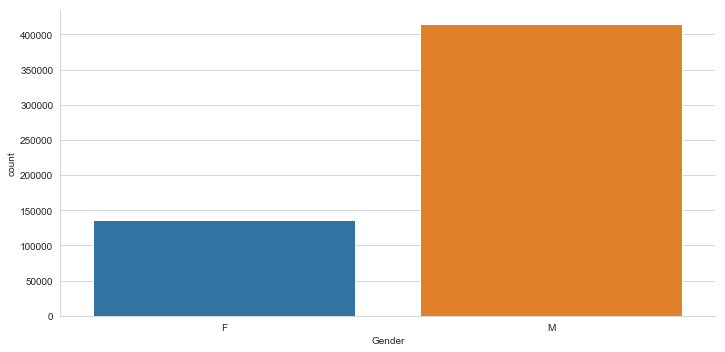

In [8]:
#Categorical variable
sns.catplot('Gender', data = df, kind = 'count', aspect = 2)
print (df['Gender'].value_counts())

1. On the Gender there are more male buyers than Females. So it might be interesting to see if there are also difference with the number of purchases.

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64


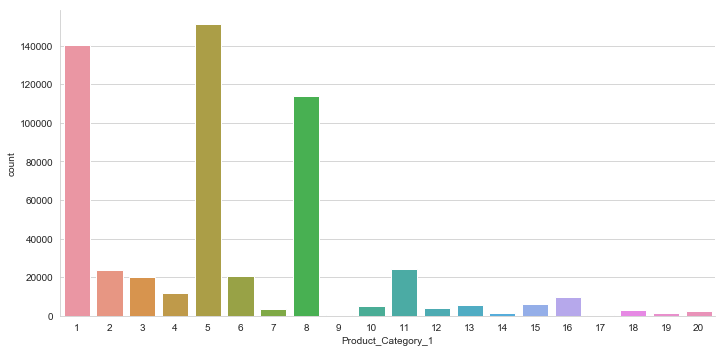

In [9]:
sns.catplot('Product_Category_1', data = df, kind = 'count', aspect = 2)
print (df['Product_Category_1'].value_counts())

Observation: 
 Product category 1 has products that have lesser number of purchase compared to 1-6 and 8 and these are products: 9,17,19,20


8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64


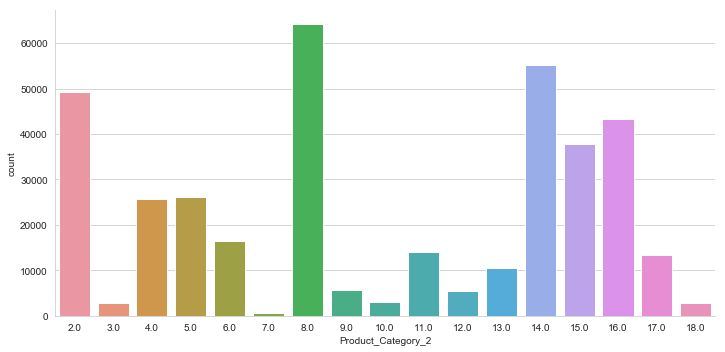

In [10]:
sns.catplot('Product_Category_2', data = df, kind = 'count', aspect = 2)
print (df['Product_Category_2'].value_counts())

3. Product category 2 has 7.0 as the lowest frequency

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64


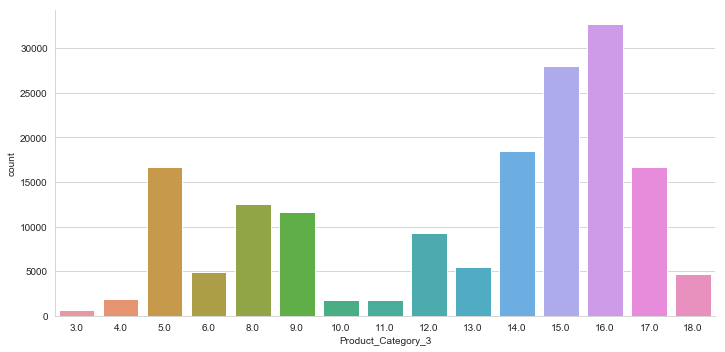

In [11]:
sns.catplot('Product_Category_3', data = df, kind = 'count', aspect = 2)
print (df['Product_Category_3'].value_counts())

Product 3 has the lowest frequency in Product category 3.

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


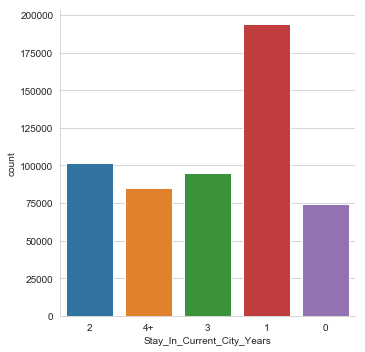

In [12]:
sns.catplot(x ='Stay_In_Current_City_Years', data = df, kind = 'count')
print (df['Stay_In_Current_City_Years'].value_counts())

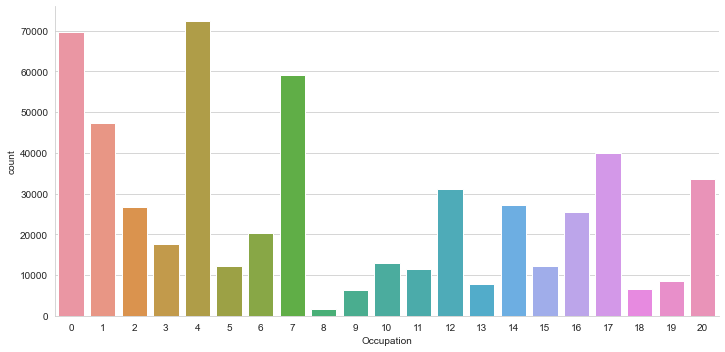

In [16]:
sns.catplot(x ='Occupation', data = df, kind = 'count',aspect = 2)
#print (df['Occupation'].value_counts())

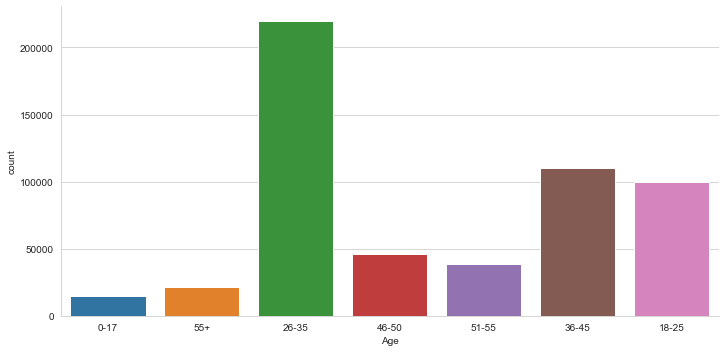

In [14]:
sns.catplot(x ='Age', data = df, kind = 'count',aspect = 2)

# Bi-variate Analysis

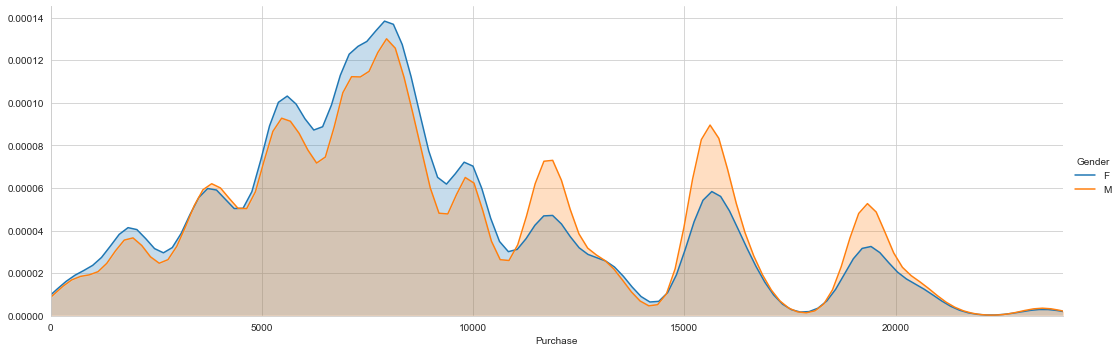

In [18]:
# this is to see if the males and females have the same purchase or not.
fig = sns.FacetGrid(df, hue = 'Gender', aspect = 3, height = 5)
fig.map(sns.kdeplot,'Purchase',shade=True)
biggest = df['Purchase'].max()
fig.set(xlim=(0,biggest))
fig.add_legend()

Observation: Females tends to buy more on cheaper products ranging 0 to 11000, and males tends to buy more expensive products from 10,000 to 20000+.

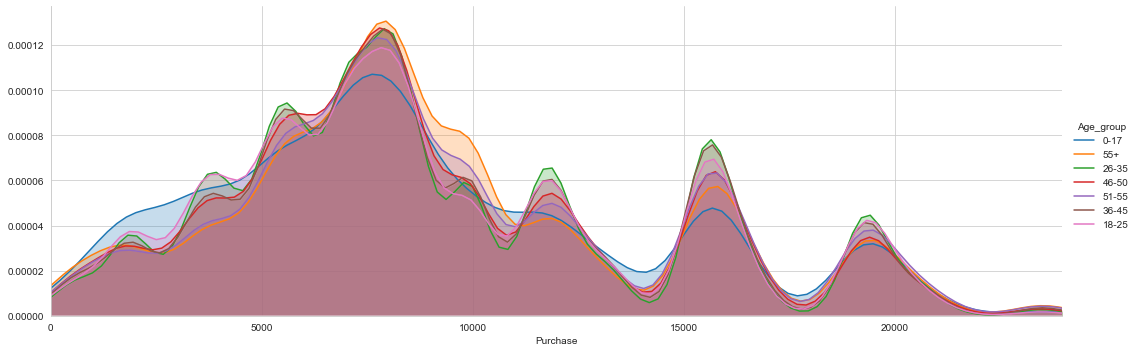

In [13]:
#Comparison between the purchase by the age group.
age_group = {'0-17': '0-17', '18-25': '18-25', '26-35':'26-35', '36-45': '36-45', '46-50': '46-50',
             '36-45': '36-45', '51-55': '51-55', '55+':'55+'}
df['Age_group'] = df['Age'].map(age_group)
fig = sns.FacetGrid(df, hue = 'Age_group', aspect = 3, height = 5)
fig.map(sns.kdeplot,'Purchase',shade=True)
biggest = df['Purchase'].max()
fig.set(xlim=(0,biggest))
fig.add_legend()

Observation: young age group (0-17, shown in blue) buys more on the cheaper prices and the rest of the age groups have a little bit of difference only on the other price range.  

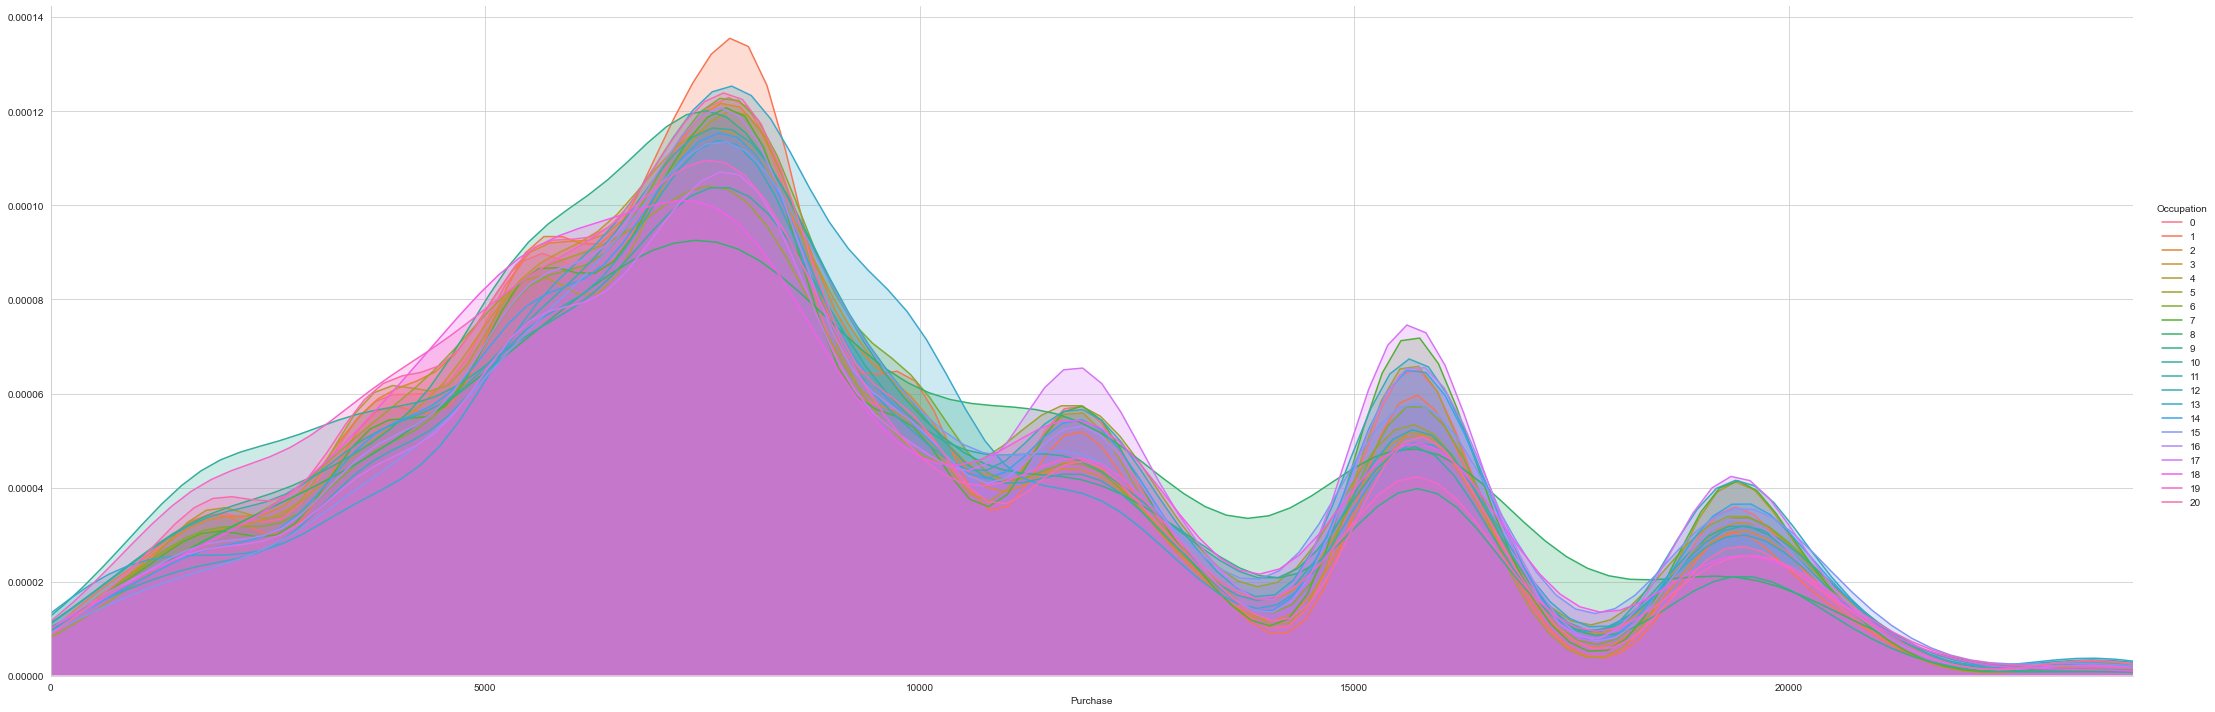

In [17]:
# Comparison between the Purchase by the occupation
fig = sns.FacetGrid(df, hue = 'Occupation', aspect = 3, height = 10)
fig.map(sns.kdeplot,'Purchase',shade=True)
biggest = df['Purchase'].max()
fig.set(xlim=(0,biggest))
fig.add_legend()

Earlier we conclude that the higer income occupation buy more but in the data we really cannot see what's happening and it doesnt show clear representation. So we will check the mean. 

In [21]:
# getting the mean of all the Purchases from the different occupation category
purchase_per_occupation = df['Purchase'].groupby(df['Occupation'])
purchase_per_occupation.mean().nlargest(10) # showing the top 10

Occupation
17    9821.478236
12    9796.640239
15    9778.891163
8     9532.592497
14    9500.702772
7     9425.728223
16    9394.464349
5     9333.149298
13    9306.351061
6     9256.535691
Name: Purchase, dtype: float64

The only a little bit of difference between the means on different occupations and this also tells us nothing because some people might stil spend more even if their income are lesser and some people might spend less even if their income is higher. 

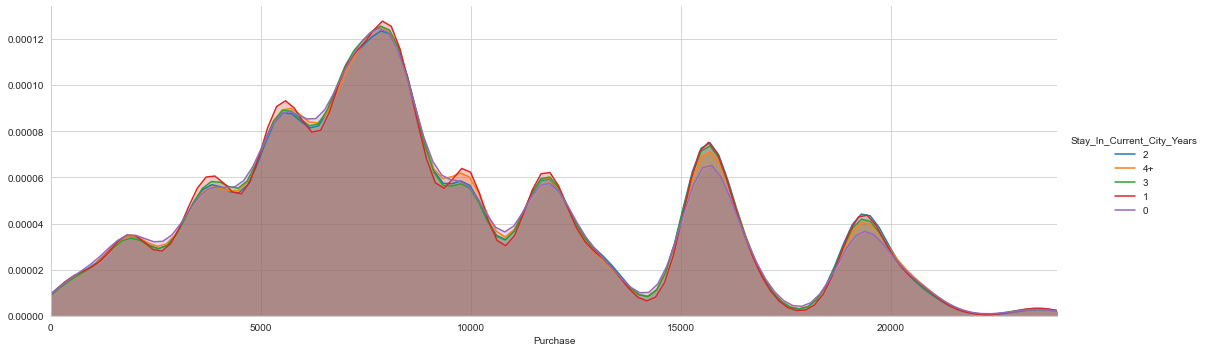

In [22]:
#Comparison between the 'purhase' and 'the stay in current years'
fig = sns.FacetGrid(df, hue = 'Stay_In_Current_City_Years', aspect = 3, height = 5)
fig.map(sns.kdeplot,'Purchase',shade=True)
biggest = df['Purchase'].max()
fig.set(xlim=(0,biggest))
fig.add_legend()

In [52]:
#numerical representation of the above graph showing their mean
purchase_per_stay = df['Purchase'].groupby(df['Stay_In_Current_City_Years'])
purchase_per_stay.mean()

Stay_In_Current_City_Years
0     9180.075123
1     9250.145923
2     9320.429810
3     9286.904119
4+    9275.598872
Name: Purchase, dtype: float64

The stay in current years doesnt have any impact on the purchase. 

In [53]:
#check the mean of Purchase with Product_Cateogory_1, 2, 3
purchase_per_cat1 = df['Purchase'].groupby(df['Product_Category_1'])
purchase_per_cat1.mean()

# 'Product_Category_1' 19 & 20 has low frequencies based on Purchase

Product_Category_1
1     13606.218596
2     11251.935384
3     10096.705734
4      2329.659491
5      6240.088178
6     15838.478550
7     16365.689600
8      7498.958078
9     15537.375610
10    19675.570927
11     4685.268456
12     1350.859894
13      722.400613
14    13141.625739
15    14780.451828
16    14766.037037
17    10170.759516
18     2972.864320
19       37.041797
20      370.481176
Name: Purchase, dtype: float64

In [54]:
purchase_per_cat2 = df['Purchase'].groupby(df['Product_Category_2'])
purchase_per_cat2.mean()

Product_Category_2
2.0     13619.356401
3.0     11235.359570
4.0     10215.192001
5.0      9027.821574
6.0     11503.551379
7.0      6884.683706
8.0     10273.259518
9.0      7277.006851
10.0    15648.729543
11.0     8940.580515
12.0     6975.472504
13.0     9683.352388
14.0     7105.264916
15.0    10357.077691
16.0    10295.681933
17.0     9421.576577
18.0     9352.440433
Name: Purchase, dtype: float64

In [55]:
purchase_per_cat3 = df['Purchase'].groupby(df['Product_Category_3'])
purchase_per_cat3.mean()

Product_Category_3
3.0     13939.696574
4.0      9794.386667
5.0     12117.786889
6.0     13194.311043
8.0     13024.918882
9.0     10431.697210
10.0    13505.813441
11.0    12091.437673
12.0     8715.512762
13.0    13185.118703
14.0    10052.594530
15.0    12339.369900
16.0    11981.890642
17.0    11769.943001
18.0    10993.980773
Name: Purchase, dtype: float64

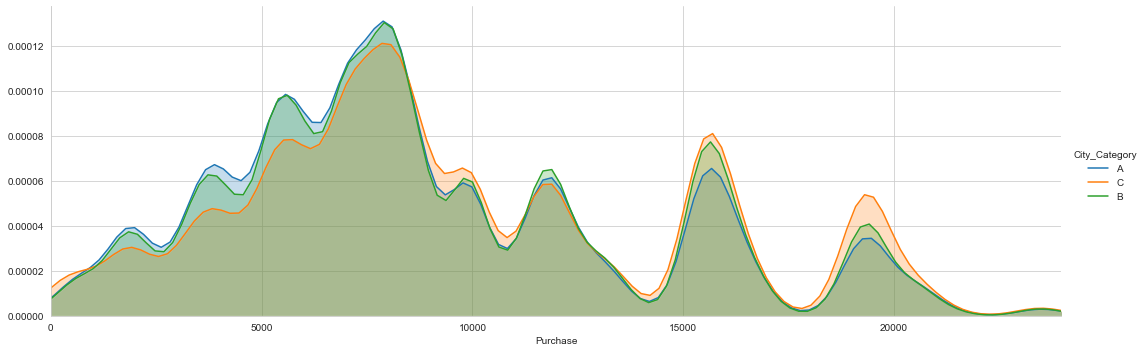

In [23]:
#comparison between city category and purchase
fig = sns.FacetGrid(df, hue = 'City_Category', aspect = 3, height = 5)
fig.map(sns.kdeplot,'Purchase',shade=True)
biggest = df['Purchase'].max()
fig.set(xlim=(0,biggest))
fig.add_legend()

City category C might be a city which has more luxury products available compared to the other cities A and B. Cities A and B might have cheaper products available 

Product_Category_1,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,Max_value,Sum
Gender,,,,,,,,,,,,,,,,,,,,,
F,24831,5658,6006,3639,41961,4559,943,33558,70,1162,...,1462,623,1046,2402,62,382,451,723,41961,177770
M,115547,18206,14207,8114,108972,15907,2778,80367,340,3963,...,4087,900,5244,7426,516,2743,1152,1827,115547,529806


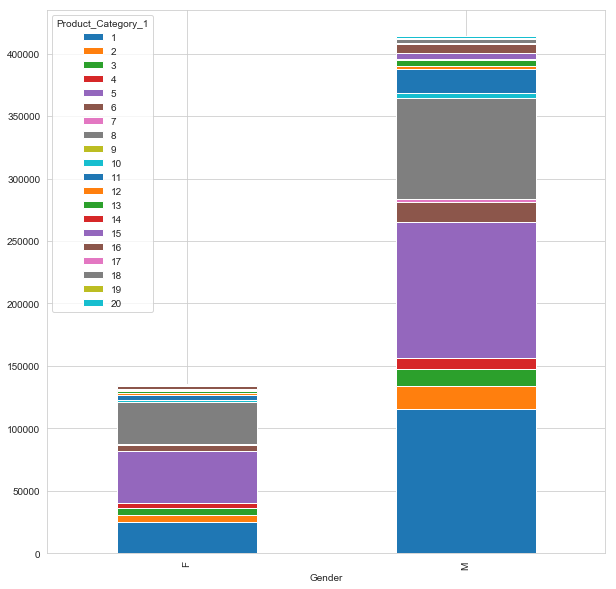

In [57]:
# Gender to product category 1
df2 = df.groupby(['Gender','Product_Category_1'])['Gender'].count().unstack('Product_Category_1').fillna(99)
df2.plot(kind='bar', figsize=(10,10), stacked = True )
df2['Max_value'] = df2.apply(max,axis = 1)
df2['Sum'] = df2.apply(sum, axis = 1)
df2.head()

Here, we want to see what kind of Products in Product category 1 Males and Females buy. It is visible that product 5 is the most bought Product in Females (shown in Violet) and Product 1 (shown in Blue is) the most bought products in Males 

Product_Category_2,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,Max_value
Gender,,,,,,,,,,,,,,,,,,
F,9199,617,7619,6155,3291,137,16529,1497,736,2754,1744,2669,19693,6432,9496,2484,478,19693
M,40018,2267,18058,20080,13175,489,47559,4196,2307,11380,3784,7862,35415,31423,33759,10836,2292,47559


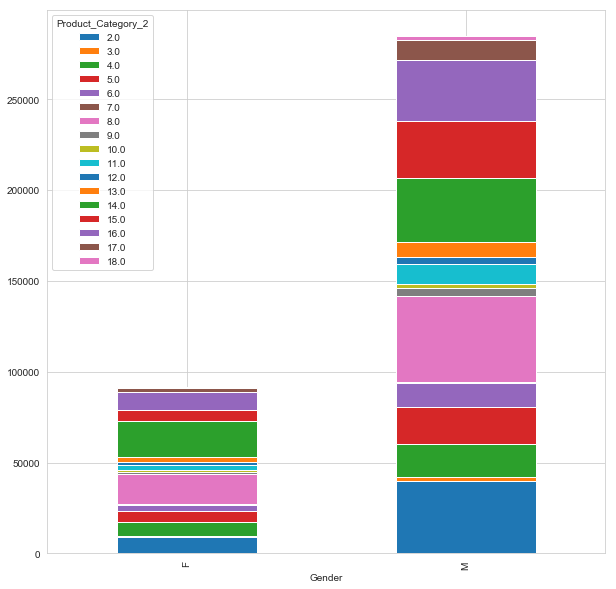

In [58]:
# Gender to Produc_category 2
df2 = df.groupby(['Gender','Product_Category_2'])['Gender'].count().unstack('Product_Category_2').fillna(99)
df2.plot(kind='bar', figsize=(10,10), stacked = True )
df2['Max_value'] = df2.apply(max, axis = 1)
df2

Here, we want to see what kind of Products in Product category 2 Males and Females buy. For females product 14 shown in green is the most bought products and for males 8 shown in pink has the higher sales. 

Product_Category_3,3.0,4.0,5.0,6.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,Max_value
Gender,,,,,,,,,,,,,,,,
F,95,433,4297,828,2941,2676,414,334,2722,1229,5623,4610,6774,3738,880,6774
M,518,1442,12361,4062,9621,8903,1312,1471,6524,4230,12805,23403,25862,12964,3749,25862


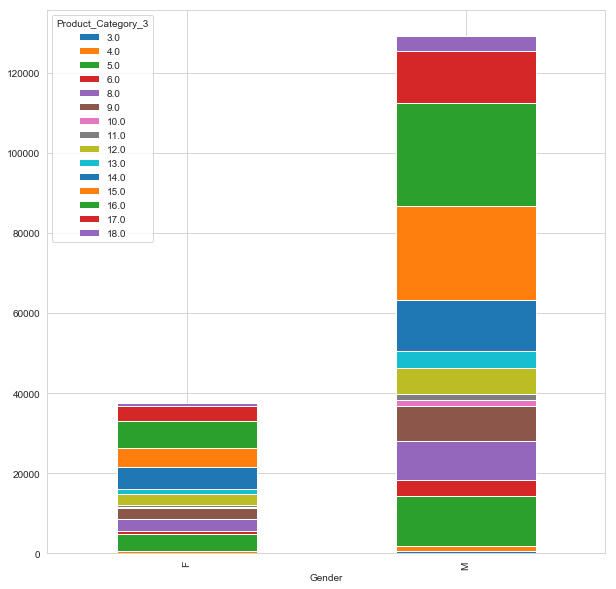

In [59]:
#Gender to Product_Category_3
df2 = df.groupby(['Gender','Product_Category_3'])['Gender'].count().unstack('Product_Category_3').fillna(99)
df2.plot(kind='bar', figsize=(10,10), stacked = True )
df2['Max_value'] = df2.apply(max, axis = 1)
df2

Here, we want to see what kind of Products in Product category 3 Males and Females buy. For females the product which consists the highest sales is 16 shown in green and for males they buy product 16 as well.

Product_Category_1,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,Max_value,total
Age,,,,,,,,,,,,,,,,,,,,,
0-17,3585,805,1200,758,4330,399,53,2258,16,111,...,112,39,160,229,6,27,59,90,4330,19432
18-25,26962,4428,4710,2463,28522,3749,481,17911,63,603,...,756,230,1024,1598,41,339,275,469,28522,128182
26-35,58249,8928,7662,4192,61473,8485,1651,44256,154,1787,...,2096,564,2372,4118,127,1042,563,898,61473,281060
36-45,27648,4912,3854,2354,29377,3899,809,23296,107,1235,...,1250,312,1395,1955,135,702,320,506,29377,139390
46-50,10474,2105,1376,990,11971,1622,327,10656,33,520,...,551,149,602,879,95,351,149,227,11971,57672


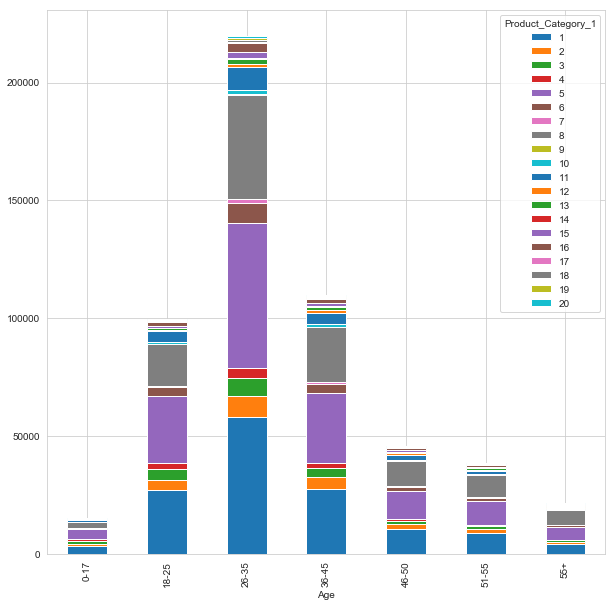

In [60]:
# Age to product category 1
df2 = df.groupby(['Age','Product_Category_1'])['Age'].count().unstack('Product_Category_1').fillna(99)
df2.plot(kind='bar', figsize=(10,10), stacked = True )
df2['Max_value'] = df2.apply(max, axis = 1)
df2['total'] = df2.apply(sum, axis = 1)
df2.head()

Age group (0-17): Buys product 5 more <br>
Age group (18-25):Buys product 1 more <br>
Age group (26-35): Buys product 5 more<br>
Age group (36-45): Buys product 5 more<br>
Age group (45-50): Buys product 5 more<br>
Age group (46-50): Buys product 5 more<br>
Age group (51-55): Buys product 5 more<br>
Age group (55+): Buys product 18 more
